### Empirical Example One for RobustiPY!

Lets first load in two basic python libraries that we'll need for this example: the `os` module (for path handling), and `matplotlib.pyplot` (for plotting)

In [1]:
import os
import matplotlib.pyplot as plt

Let's make sure that we have RobustiPy installed. To do this, go to the place where you want to install RobustiPy files to, and do:

```bash
git clone https://github.com/RobustiPy/robustipy.git
cd robustipy
pip install .

Note next that this example uses the NLSW88 dataset (THE National Longitudinal Survey of Women in 1988), extracted from National Longitudinal of Young Woman who were ages 14-24 in 1988. This dataset is the result of extraction and processing by various people at various times. For more information on the NLS(see [http://www.bls.gov/nls/](http://www.bls.gov/nls/) or [https://www.nlsinfo.org/weights/nlsyw](https://www.nlsinfo.org/weights/nlsyw) for more details). Importantly, this dataset is entirely anonymised, publicly available, and comes bundled with both this repository and the RobustiPy main package.

Importantly, you should make sure that you have a copy of the nswl88.dta file located at somewhere like `.data\input`.

Now, let's load the two RobustiPy utils that we're going to need:

In [2]:
from robustipy.utils import prepare_union
from robustipy.models import OLSRobust

Our key objective is going to try to assess the effect of unionisation (i.e. our 'x' or '$\beta_1$' on wage. To do this, we'll vary various specifications along the way, and compare our results against other results in the literature\other statistical software.

Next, now that we've got this research question, robustipy installed, and our data set up, lets define a very simple function for this union example, and comment along as we go.

In [3]:
def union_example():
    """ A simple function for estimating the wage premium or
        penalty as a function of the NLSW1988 dataset using
        RobustiPy.

        Inputs: None
        Outputs: None
    """
    
    # First, lets make a simple function call which prepares this data akin with the best
    # practice econometric\statistical literature. This function comes wrapped inside 
    # RobustiPy as it's one of the headline examples of the library.

    # Importantly, we extract our: 'y' (dependent variable: wages),
    #                              'x' (indep. variable of interest: union membership)
    #                              'c' (our set of various controls).
    
    y, c, x, data = prepare_union(os.path.join('data',
                                               'input',
                                               'nlsw88.dta'
                                              )
                                 )

    # Now, lets make our first function call to RobustiPy, specifying x, y, and the dataset.

    union_robust = OLSRobust(y=[y], x=[x], data=data)

    # We're next going to 'Fit' our model, specifying: 'c'     (our set of various controls)
    #                                                  'draws' (the number of bootstraps we want)
    #                                                  'kfold' (the number of k-folds we want)
                    
    union_robust.fit(controls=c,
                     draws=1000,
                     kfold=100,
                    )

    # Next, we want to get the results from this fit:
    
    union_results = union_robust.get_results()

    # Finally, we want to plot these results. The 'specs' command allows us to plot the values
    # from three specific pre-secified specifications (as a list of lists), as well as a
    # specific information criterion. We can also specify the figure size.
    
    union_results.plot(specs=[['hours', 'collgrad'],
                              ['collgrad'],
                              ['hours', 'age']],
                       ic='hqic',
                       figsize=(16, 12))

    # Finally, save this figure out. First, set a (default) location:
    
    figpath = os.path.join(os.getcwd(), 'figures', 'union_example')

    # Check this path exists, if not, create it:
    
    if not os.path.exists(figpath):
        os.makedirs(figpath)

    # Finally, save the figure to that specific place as a .png file.
    
    plt.savefig(os.path.join(figpath, 'union_curve.png'))

Great: now that we've defined our union plotting function, lets actually call it:

Output()

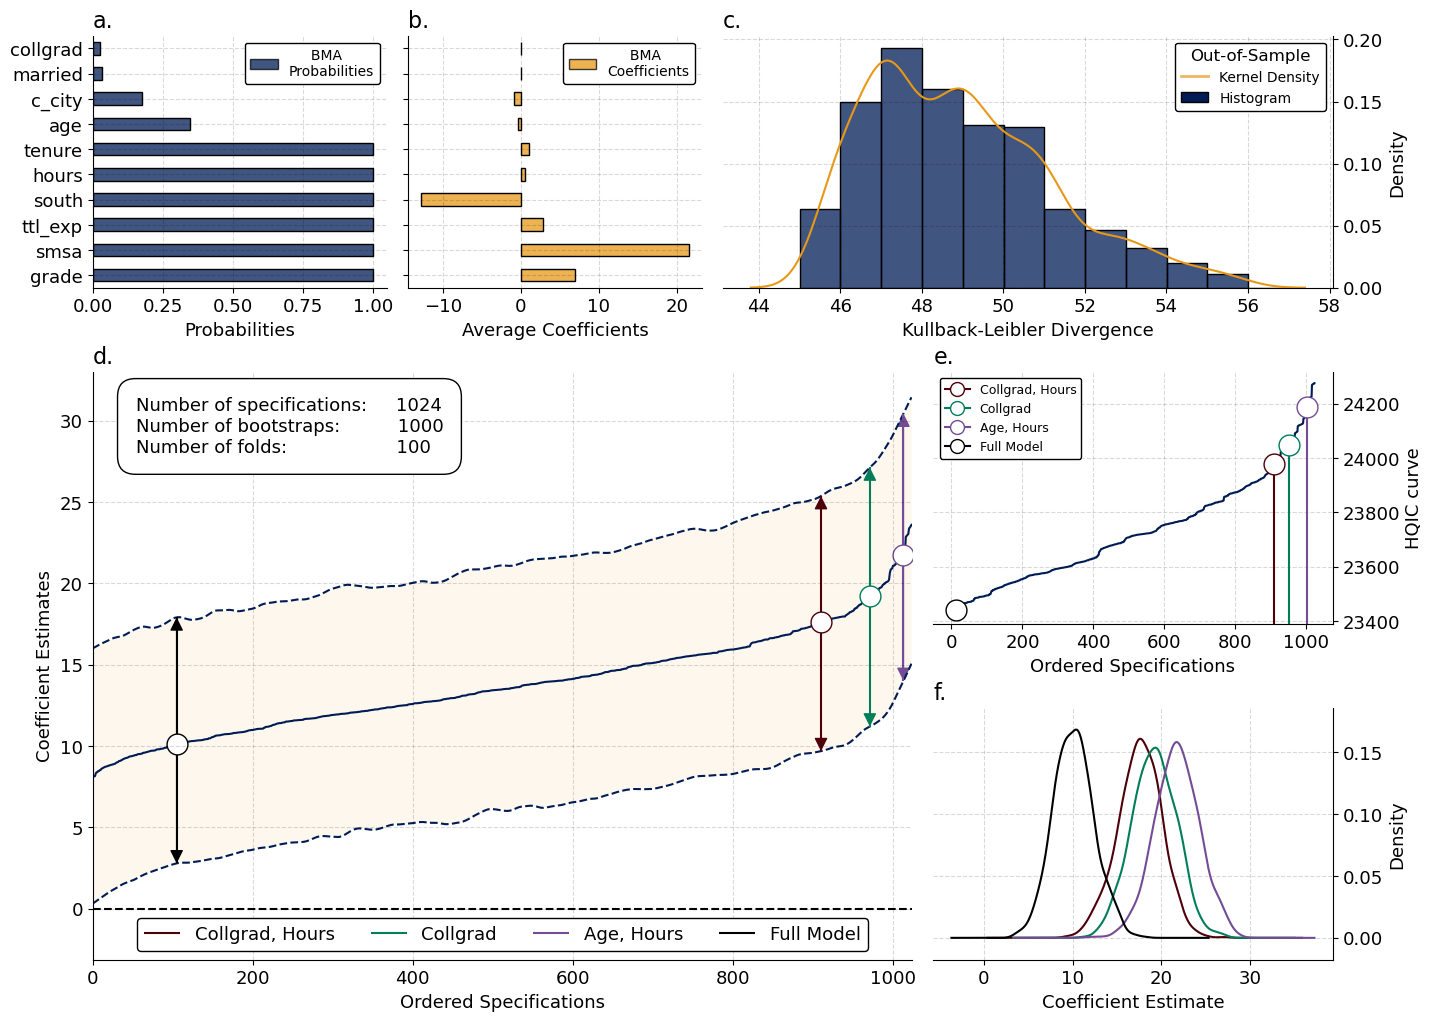

In [4]:
union_example()

Ta da!